# Bài tập K-Means

## Gọi các bộ thư viện thường dùng

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Tạo ra bộ dữ liệu gồm 5 nhóm sử dụng make blobs

In [31]:
from sklearn.datasets import make_blobs

In [32]:
X, y = make_blobs(n_samples= 250,
                  n_features= 2,
                  centers = ([0.,0],[3,4],[5,1],[1,7], [6,5]),
                  cluster_std=0.5,
                  shuffle= True,
                  random_state=42)

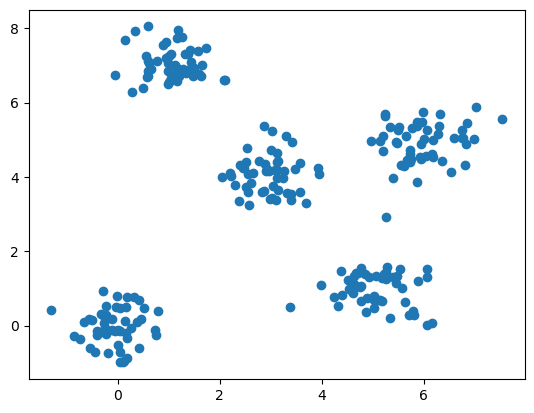

In [33]:
plt.plot(X[:,0], X[:,1],'o')

## Sử dụng đồ thị lớp - inertia tìm elbow để kiểm tra K

In [34]:
max_k = 11
inertias = np.zeros(max_k-1)
for i in range(1, max_k):
    km = KMeans(n_clusters=i,
    init='k-means++',
    n_init=10,
    max_iter=300,
    random_state=0)
    km.fit(X)
    inertias[i-1]= km.inertia_

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

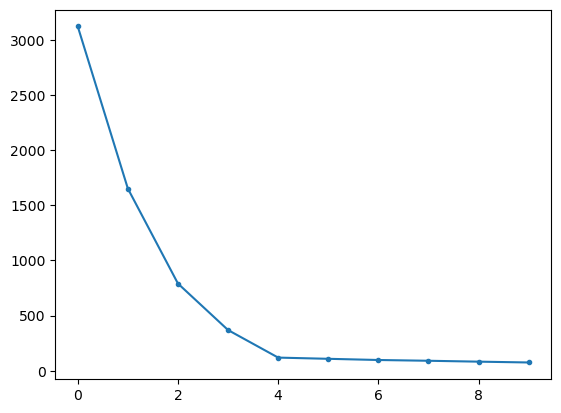

In [39]:
plt.plot(inertias,'.-')

Từ đồ thị ta thấy k = 4 có thể được chọn. Nhưng ta tạo bộ dữ liệu có 5 nhóm, do đó phương pháp chọn bằng sử dụng inertia chưa chính xác lắm.

## Phân tích Silhouette

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


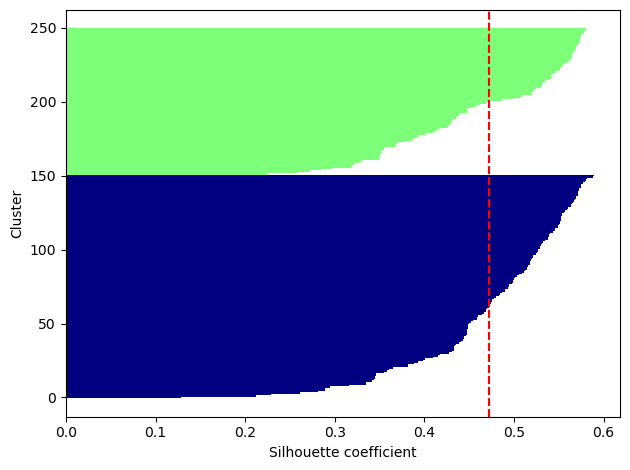

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


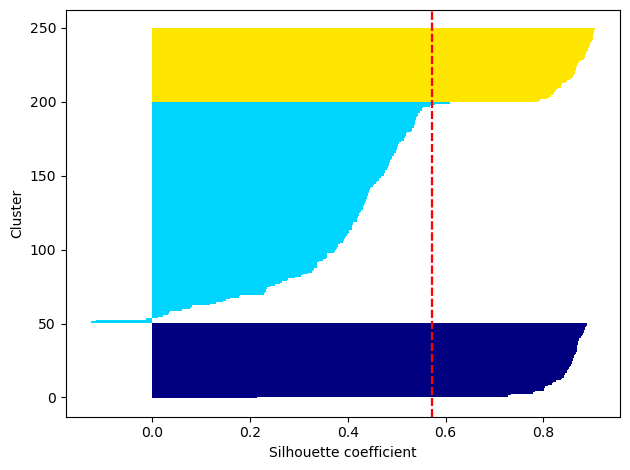

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


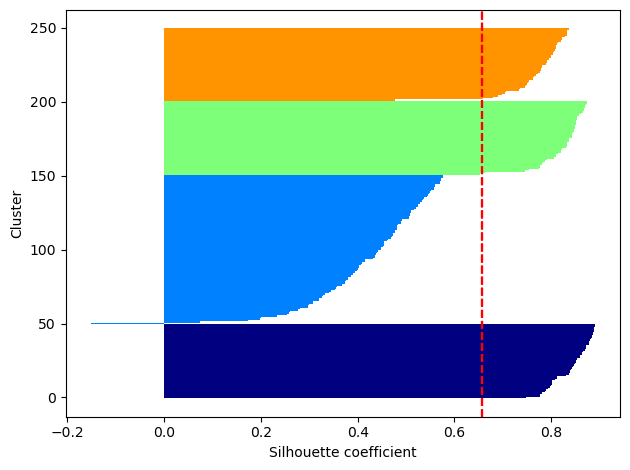

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


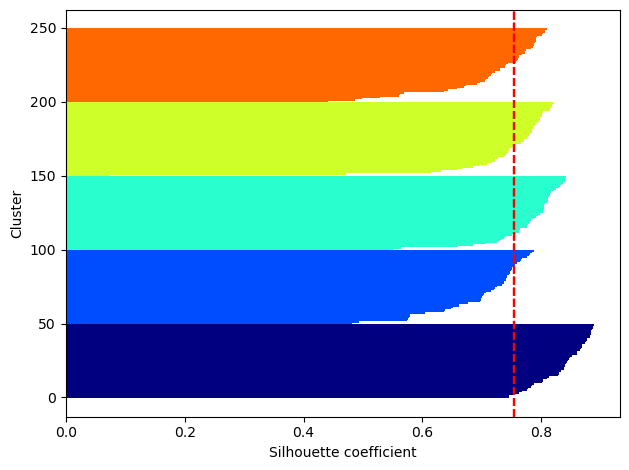

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


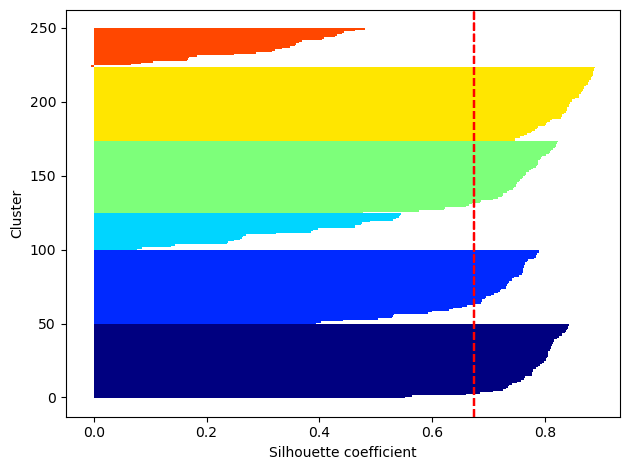

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


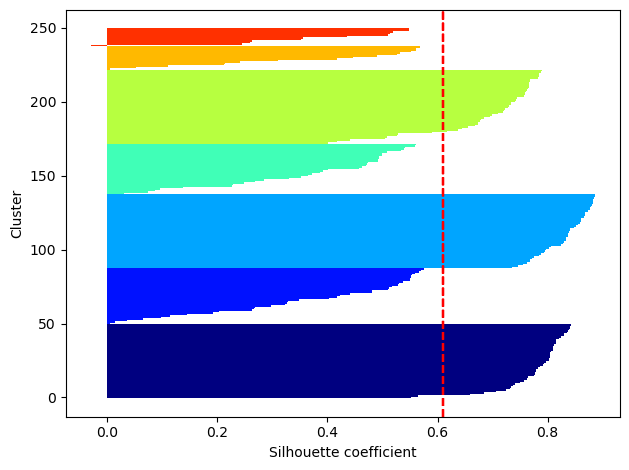

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


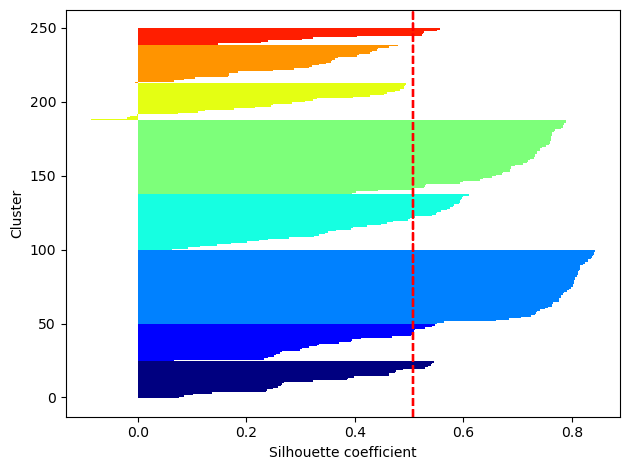

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


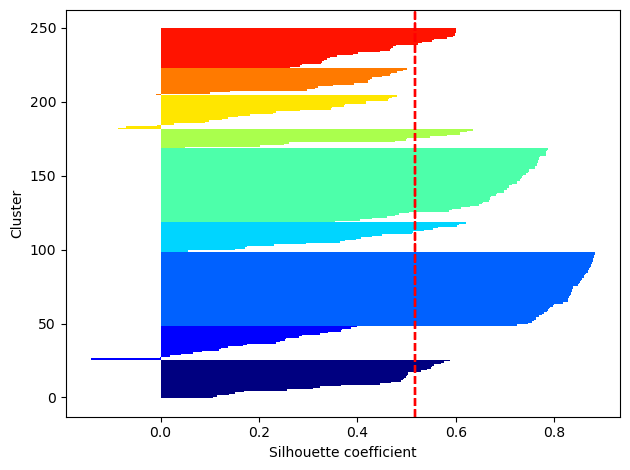

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


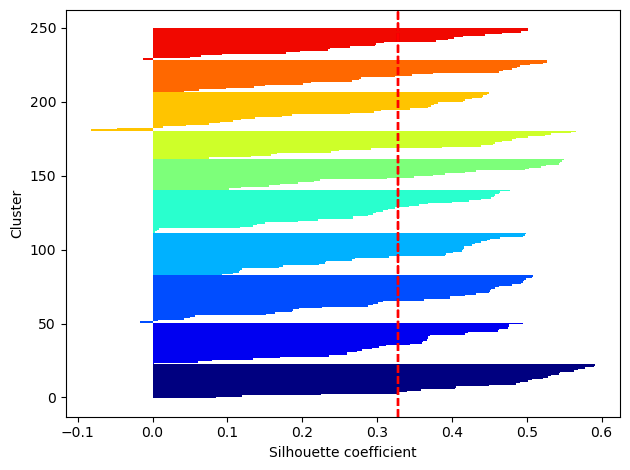

In [47]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

max_k = 11
silhouette_list = np.zeros(max_k-2)
k = range(2, max_k)
for i in range(2, max_k):
    km = KMeans(n_clusters=i,
        init='k-means++',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=0)
    y_km = km.fit_predict(X)

    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for j, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(j) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor='none',
        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
        silhouette_avg = np.mean(silhouette_vals)

        silhouette_list[i-2] = silhouette_avg
        plt.axvline(silhouette_avg, color="red",linestyle="--")
        
        plt.ylabel('Cluster')
        plt.xlabel('Silhouette coefficient')
        plt.tight_layout()
    plt.show()

Text(0, 0.5, 'Silhouette Score')

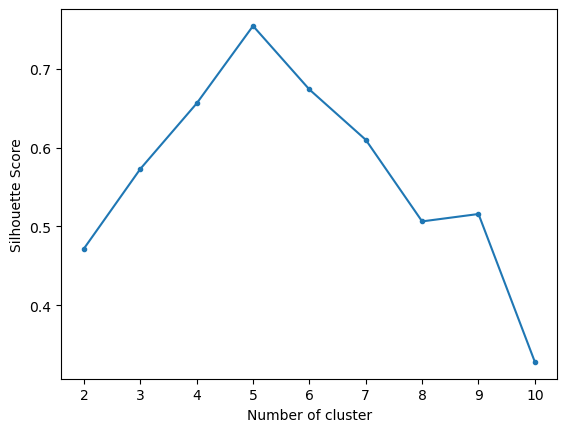

In [49]:
plt.plot(k, silhouette_list,'.-')
plt.xlabel('Number of cluster')
plt.ylabel('Silhouette Score')

Dựa vào phân tích Silhouette, ta thấy k = 5 là tốt nhất

## Cố định k = 5 nhóm, phân loại và vẽ Voronoi

In [52]:
km = KMeans(n_clusters=5,
        init='k-means++',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=0)
km.fit(X)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, n_init=10, random_state=0)

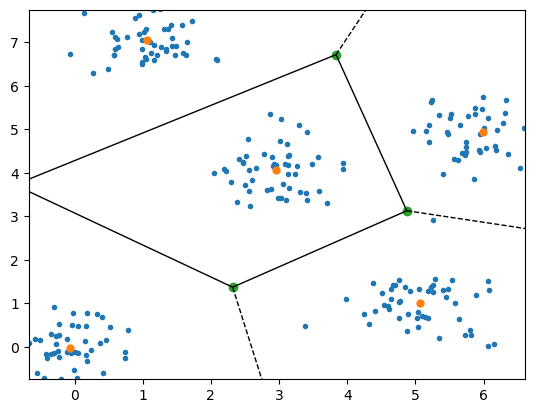

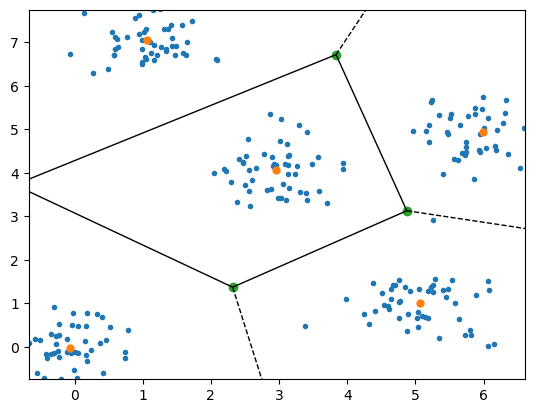

In [62]:
from scipy.spatial import Voronoi, voronoi_plot_2d

centroids = km.cluster_centers_

vor = Voronoi(centroids)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X[:,0], X[:,1],'.')
voronoi_plot_2d(vor, point_size=10, ax=ax)

